# eCommerce Transactions Data Science Assignment

## Overview
This assignment involves performing exploratory data analysis (EDA), building a Lookalike Model, and performing customer segmentation on an eCommerce transactions dataset.


### Dataset Files
1. **Customers.csv**: Contains customer information.
2. **Products.csv**: Contains product information.
3. **Transactions.csv**: Contains transaction details.


### Tasks
 1. **Task 1**: Perform EDA and derive business insights.
 2. **Task 2**: Build a Lookalike Model.
 3. **Task 3**: Perform Customer Segmentation using clustering.

# Task 3: Perform Customer Segmentation using clustering.
### Overview
Perform customer segmentation using clustering techniques. Use both profile information (from `Customers.csv`) and transaction information (from `Transactions.csv`).

### Steps:
 1. Load and preprocess the data.
 2. Perform feature engineering to create meaningful features.
 3. Standardize the data for clustering.
 4. Determine the optimal number of clusters using the Elbow Method and Davies-Bouldin Index.
 5. Perform K-Means clustering.
 6. Evaluate the clusters using clustering metrics.
 7. Visualize the clusters using PCA for dimensionality reduction.
 8. Analyze the clusters to derive insights.

## Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

## Step 2: Load the Data

In [2]:
def load_data(customers_file, transactions_file):
    """
    Load the Customers and Transactions data from CSV files.
    """
    customers_df = pd.read_csv(customers_file)
    transactions_df = pd.read_csv(transactions_file)
    return customers_df, transactions_df

# Load the data
customers_df, transactions_df = load_data('Customers.csv', 'Transactions.csv')

# Display the first few rows of each dataframe
print("Customers Data:")
print(customers_df.head())

print("\nTransactions Data:")
print(transactions_df.head())

Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


## Step 3: Data Preprocessing

In [3]:
def merge_data(customers_df, transactions_df):
    """
    Merge Customers and Transactions data on CustomerID.
    """
    merged_df = pd.merge(customers_df, transactions_df, on='CustomerID')
    return merged_df

# Merge the data
merged_df = merge_data(customers_df, transactions_df)

# Display the merged dataframe
print("Merged Data:")
print(merged_df.head())

Merged Data:
  CustomerID      CustomerName         Region  SignupDate TransactionID  \
0      C0001  Lawrence Carroll  South America  2022-07-10        T00015   
1      C0001  Lawrence Carroll  South America  2022-07-10        T00932   
2      C0001  Lawrence Carroll  South America  2022-07-10        T00085   
3      C0001  Lawrence Carroll  South America  2022-07-10        T00445   
4      C0001  Lawrence Carroll  South America  2022-07-10        T00436   

  ProductID      TransactionDate  Quantity  TotalValue   Price  
0      P054  2024-01-19 03:12:55         2      114.60   57.30  
1      P022  2024-09-17 09:01:18         3      412.62  137.54  
2      P096  2024-04-08 00:01:00         2      614.94  307.47  
3      P083  2024-05-07 03:11:44         2      911.44  455.72  
4      P029  2024-11-02 17:04:16         3     1300.92  433.64  


## Step 4: Feature Engineering

In [4]:
def create_features(merged_df, customers_df):
    """
    Create new features: TotalSpending and NumTransactions.
    """
    # Total Spending per Customer
    total_spending = merged_df.groupby('CustomerID')['TotalValue'].sum().reset_index()
    total_spending.rename(columns={'TotalValue': 'TotalSpending'}, inplace=True)
    customers_df = pd.merge(customers_df, total_spending, on='CustomerID')

    # Number of Transactions per Customer
    num_transactions = merged_df.groupby('CustomerID')['TransactionID'].count().reset_index()
    num_transactions.rename(columns={'TransactionID': 'NumTransactions'}, inplace=True)
    customers_df = pd.merge(customers_df, num_transactions, on='CustomerID')

    return customers_df

# Create new features
customers_df = create_features(merged_df, customers_df)

# Display the updated customers dataframe
print("Updated Customers Data:")
print(customers_df.head())

Updated Customers Data:
  CustomerID        CustomerName         Region  SignupDate  TotalSpending  \
0      C0001    Lawrence Carroll  South America  2022-07-10        3354.52   
1      C0002      Elizabeth Lutz           Asia  2022-02-13        1862.74   
2      C0003      Michael Rivera  South America  2024-03-07        2725.38   
3      C0004  Kathleen Rodriguez  South America  2022-10-09        5354.88   
4      C0005         Laura Weber           Asia  2022-08-15        2034.24   

   NumTransactions  
0                5  
1                4  
2                4  
3                8  
4                3  


## Step 5: Data Standardization

In [5]:
def standardize_features(customers_df, features):
    """
    Standardize the features for clustering.
    """
    X = customers_df[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, scaler

# Standardize the features
features = ['TotalSpending', 'NumTransactions']
X_scaled, scaler = standardize_features(customers_df, features)

# Display the scaled data
print("Scaled Data:")
print(X_scaled[:5])

Scaled Data:
[[-0.06170143 -0.01145819]
 [-0.87774353 -0.46749414]
 [-0.40585722 -0.46749414]
 [ 1.03254704  1.35664965]
 [-0.78392861 -0.92353008]]


## Step 6: Determine Optimal Number of Clusters

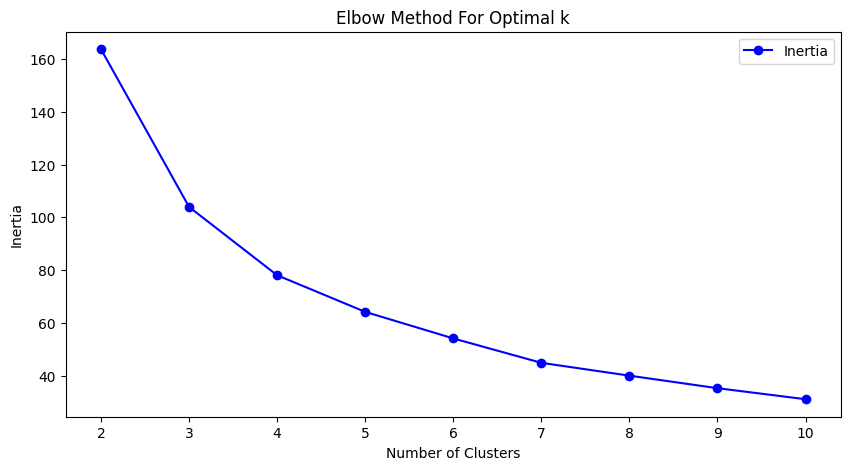

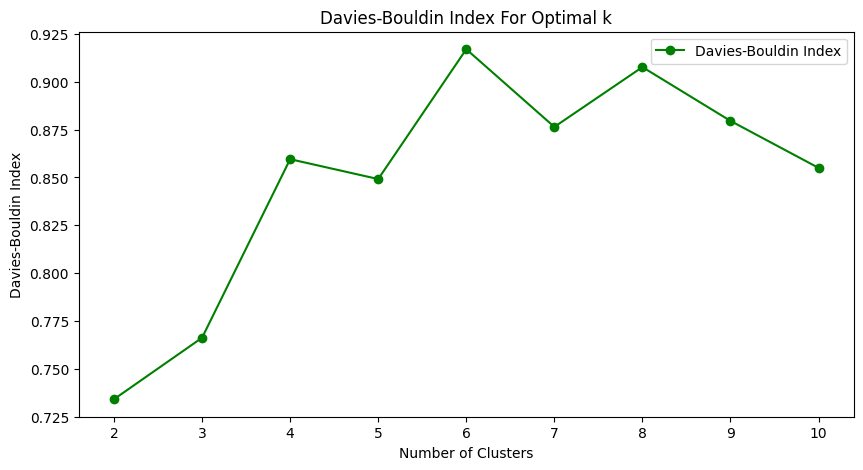

In [6]:
def find_optimal_clusters(X_scaled, max_clusters=10):
    """
    Determine the optimal number of clusters using the Elbow Method and Davies-Bouldin Index.
    """
    inertia = []
    db_scores = []
    K = range(2, max_clusters + 1)

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)
        db_scores.append(davies_bouldin_score(X_scaled, kmeans.labels_))

    # Plot the Elbow Method graph
    plt.figure(figsize=(10, 5))
    plt.plot(K, inertia, 'bo-', label='Inertia')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal k')
    plt.legend()
    plt.show()

    # Plot the Davies-Bouldin Index graph
    plt.figure(figsize=(10, 5))
    plt.plot(K, db_scores, 'go-', label='Davies-Bouldin Index')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Davies-Bouldin Index')
    plt.title('Davies-Bouldin Index For Optimal k')
    plt.legend()
    plt.show()

    return K, inertia, db_scores

# Determine the optimal number of clusters
K, inertia, db_scores = find_optimal_clusters(X_scaled, max_clusters=10)

## Step 7: Perform K-Means Clustering

In [7]:
def perform_clustering(X_scaled, n_clusters):
    """
    Perform K-Means clustering and return the cluster labels.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    return kmeans.labels_

# Perform clustering with the optimal number of clusters
optimal_k = 4  # Example: Choose based on the Elbow Method and DB Index
labels = perform_clustering(X_scaled, optimal_k)

# Add the cluster labels to the customers dataframe
customers_df['Cluster'] = labels

# Display the clustered dataframe
print("Clustered Customers Data:")
print(customers_df.head())


Clustered Customers Data:
  CustomerID        CustomerName         Region  SignupDate  TotalSpending  \
0      C0001    Lawrence Carroll  South America  2022-07-10        3354.52   
1      C0002      Elizabeth Lutz           Asia  2022-02-13        1862.74   
2      C0003      Michael Rivera  South America  2024-03-07        2725.38   
3      C0004  Kathleen Rodriguez  South America  2022-10-09        5354.88   
4      C0005         Laura Weber           Asia  2022-08-15        2034.24   

   NumTransactions  Cluster  
0                5        3  
1                4        3  
2                4        3  
3                8        0  
4                3        1  


## Step 8: Evaluate Clusters

In [8]:
def evaluate_clusters(X_scaled, labels):
    """
    Evaluate the clusters using the Davies-Bouldin Index.
    """
    db_index = davies_bouldin_score(X_scaled, labels)
    print(f"Davies-Bouldin Index: {db_index}")
    return db_index

# Evaluate the clusters
db_index = evaluate_clusters(X_scaled, labels)


Davies-Bouldin Index: 0.8595340221510472


## Step 9: Visualize Clusters

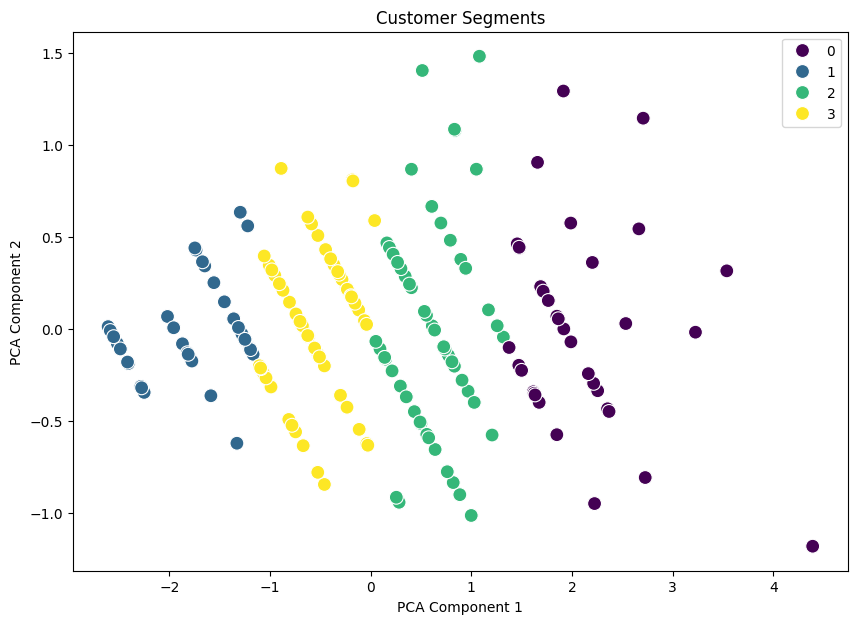

In [9]:
def visualize_clusters(X_scaled, labels):
    """
    Visualize the clusters using PCA for dimensionality reduction.
    """
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', s=100)
    plt.title('Customer Segments')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()

# Visualize the clusters
visualize_clusters(X_scaled, labels)

## Step 10: Analyze Clusters

In [10]:
def analyze_clusters(customers_df, features, labels):
    """
    Analyze the clusters by calculating the mean values of features for each cluster.
    """
    customers_df['Cluster'] = labels
    cluster_analysis = customers_df.groupby('Cluster')[features].mean()
    print("Cluster Analysis:")
    print(cluster_analysis)
    return cluster_analysis

# Analyze the clusters
features = ['TotalSpending', 'NumTransactions']
cluster_analysis = analyze_clusters(customers_df, features, labels)

Cluster Analysis:
         TotalSpending  NumTransactions
Cluster                                
0          6172.260857         8.257143
1          1200.152000         2.225000
2          4272.589286         5.964286
3          2745.519853         4.235294


In [11]:
# Summary of the clustering results
print(f"Number of Clusters: {optimal_k}")
print(f"Davies-Bouldin Index: {db_index}")
print("\nCluster Analysis:")
print(cluster_analysis)

Number of Clusters: 4
Davies-Bouldin Index: 0.8595340221510472

Cluster Analysis:
         TotalSpending  NumTransactions
Cluster                                
0          6172.260857         8.257143
1          1200.152000         2.225000
2          4272.589286         5.964286
3          2745.519853         4.235294


## Conclusion
- **Task 1**: EDA and business insights were derived.
- **Task 2**: A Lookalike Model was built and recommendations were saved.
- **Task 3**: Customer segmentation was performed using K-Means clustering.